## Time to get you hands dirty! Position of a quasar

You measure the position of a quasar $N$ times with the same telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the erorrs are $\sigma = 0.2$

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu, \sigma)$.
- Plot each of the individual likelihoods separately. Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using np.argsort) or algorithm if you are fancy
- Compare it with the MLE estimator derived above

### Part 2

Check the Fisher matrix error estimate makes sense

- do a rough $2^{nd}$ order differentation of our log-likelihood function with np.diff,
- divide through by our $\Delta \theta^2$ to get the correct normalization,
- multiply by $-1$,
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees)

### Part 3 (optional)

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma _i$
that is normally distributed with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case


In [264]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [265]:
def likelihood(x_i, mu, sigma):

    return norm.pdf(x_i, mu, sigma)

def log_likelihood(x_i, mu, sigma):
    
    return - 1 / 2 * np.log(2 * np.pi) + 2 * np.log(sigma) - (x_i - mu)**2 / (2 * sigma ** 2)

### Part 1

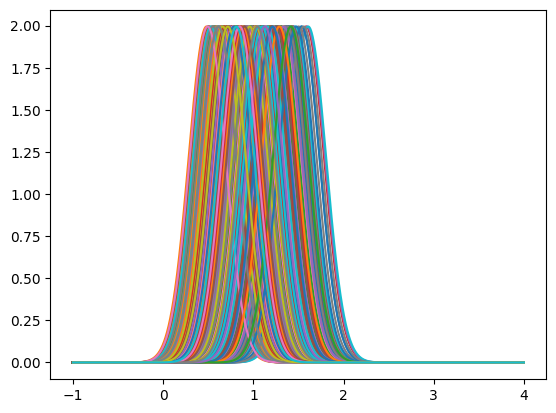

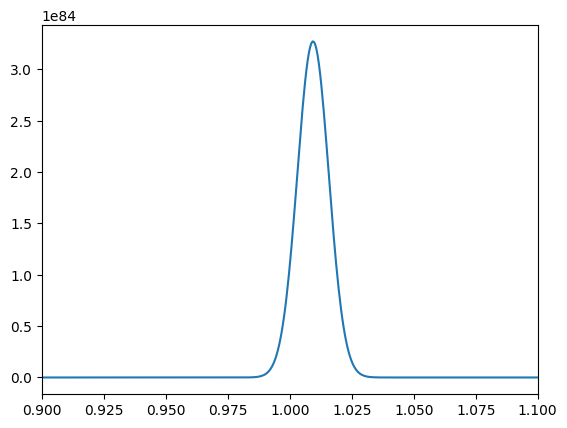

In [266]:
N = 1000
mu = 1
sigma = 0.2

data = np.random.normal(mu, sigma, N)
L = []
logL = []

mean = np.linspace(-1, 4, 10000)

for i in data:
    L_i = likelihood(i, mean, sigma)
    plt.plot(mean, L_i)
    
for j in mean:
    L.append(np.prod(likelihood(data, j, sigma)))
    logL.append(np.sum(log_likelihood(data, j, sigma)))

    
plt.show()

L = np.array(L)
plt.plot(mean, L )
plt.xlim(0.9,1.1)
plt.show()



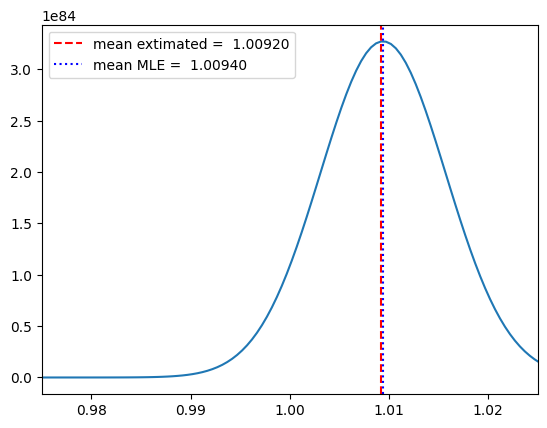

In [267]:
index = np.argmax(L)
mu_estimated = mean[index]


plt.plot(mean, L )
plt.axvline(mu_estimated, linestyle ='--', color = 'red', label = f'mean extimated = {mu_estimated: .5f}')
plt.axvline(data.mean(), linestyle =':', color = 'blue', label = f'mean MLE = {data.mean(): .5f}')
plt.xlim(0.975,1.025)
plt.legend()
plt.show()

#print(data.mean())


### Part 2

In [268]:
logL = np.array(logL)

h = mean[-1] - mean[-2]
dL = np.diff(logL, 2) / h**2

fisher = 1 / np.sqrt(-dL)[0]
print("Fisher Information:", fisher)

err_estimated = sigma / np.sqrt(N)
print("Estimator:", err_estimated)
 

Fisher Information: 0.006324555319107222
Estimator: 0.006324555320336759


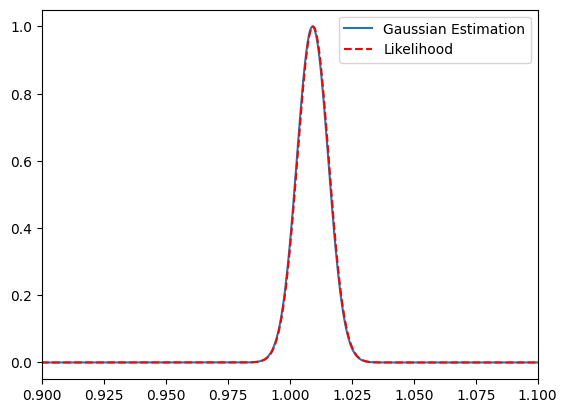

In [269]:

gauss_estimated = norm.pdf(mean, mu_estimated, fisher) * np.sqrt(2 * np.pi * fisher ** 2)
plt.plot(mean, gauss_estimated, label = 'Gaussian Estimation' )
plt.plot(mean, L/max(L), color = 'red', linestyle = '--', label = 'Likelihood' )
plt.xlim(0.9,1.1)
plt.legend()
plt.show()


### Part 3 (optional)

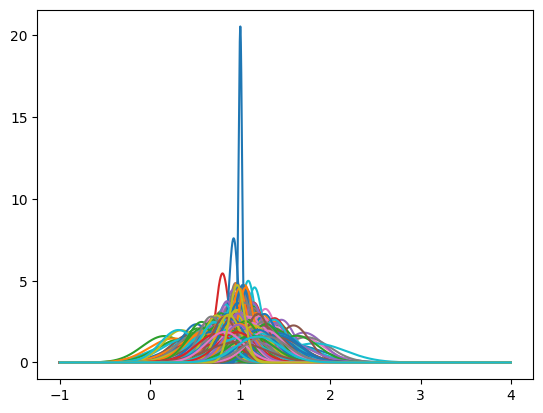

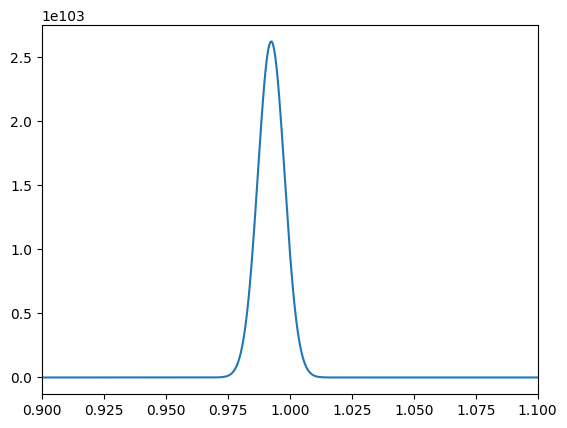

In [273]:
N = 1000

sigma_i = np.random.normal(0.2, 0.05, N)
x_i = np.random.normal(1, sigma_i, N)

L = []
logL = []

mean = np.linspace(-1, 4, 10000)

for i, x in enumerate(x_i):
    L_i = likelihood(x, mean, sigma_i[i])
    plt.plot(mean, L_i)
    
for j in mean:
    L.append(np.prod(likelihood(x_i, j, sigma_i)))
    logL.append(np.sum(log_likelihood(x_i, j, sigma_i)))


plt.show()

L = np.array(L)
plt.plot(mean, L )
plt.xlim(0.9,1.1)
plt.show()

In [274]:
def w_mean(x, s):
    return np.sum(x / s**2) / np.sum(1 / s**2)

def err_w_mean(s):
    return 1 / np.sqrt(np.sum(1 / s**2))

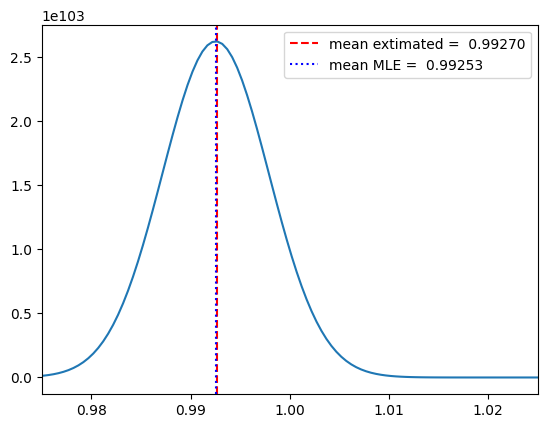

In [276]:
index = np.argmax(L)
mu_estimated = mean[index]

mu_mle = w_mean(x_i, sigma_i)



plt.plot(mean, L )
plt.axvline(mu_estimated, linestyle ='--', color = 'red', label = f'mean extimated = {mu_estimated: .5f}')
plt.axvline(mu_mle, linestyle =':', color = 'blue', label = f'mean MLE = {mu_mle: .5f}')
plt.xlim(0.975,1.025)
plt.legend()
plt.show()

In [277]:
logL = np.array(logL)

h = mean[-1] - mean[-2]
dL = np.diff(logL, 2) / h**2

fisher = 1 / np.sqrt(-dL)[0]
print("Fisher Information:", fisher)

err_estimated = err_w_mean(sigma_i)
print("Estimator:", err_estimated)
 

Fisher Information: 0.005366449818043105
Estimator: 0.005366449815569464


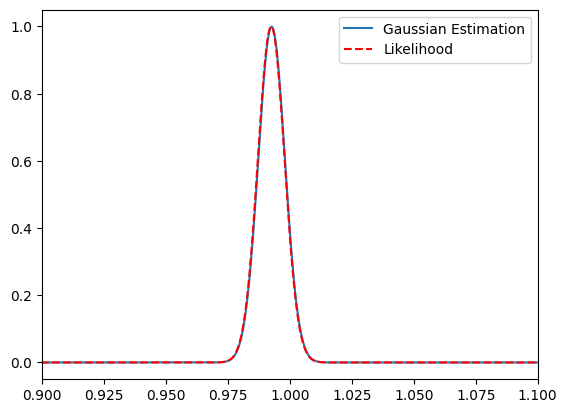

In [278]:

gauss_estimated = norm.pdf(mean, mu_estimated, fisher) * np.sqrt(2 * np.pi * fisher ** 2)
plt.plot(mean, gauss_estimated, label = 'Gaussian Estimation' )
plt.plot(mean, L/max(L), color = 'red', linestyle = '--', label = 'Likelihood' )
plt.xlim(0.9,1.1)
plt.legend()
plt.show()
